# Read Dataset

In [81]:
import pandas as pd

df = pd.read_csv('data/color_names_all.csv')
df

,name,red,green,blue
0,Abbey,76,79,86
1,Abbey White,235,229,208
2,Absolute Zero,0,72,186
3,Abyss,223,230,234
4,Acadia,27,20,4
...,...,...,...,...
5229,Zombie,228,214,155
5230,Zomp,57,167,142
5231,Zorba,165,155,145
5232,Zuccini,4,64,34


In [82]:
names = df['name']

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5234 entries, 0 to 5233
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    5234 non-null   object
 1   red     5234 non-null   int64 
 2   green   5234 non-null   int64 
 3   blue    5234 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 163.7+ KB


# Preprocessing Data
## Tokenization

In [84]:

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import preprocessing


maxlen = 30
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [85]:
padded_names.shape

(5234, 30)

## One-hot encoding

In [86]:
from keras.utils import to_categorical
one_hot_names = to_categorical(padded_names)


In [87]:
one_hot_names.shape

(5234, 30, 44)

In [100]:
one_hot_names[0]


array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Normalization

In [88]:
import numpy as np
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(df["red"]), norm(df["green"]), norm(df["blue"])])

In [89]:
normalized_values.shape

(5234, 3)

In [101]:
normalized_values[0]

array([0.29803922, 0.30980392, 0.3372549 ])

# Create model

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Reshape

model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(maxlen, 44)))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse', metrics=['acc'])

/Users/sol/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [91]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 30, 256)        │       308,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 522,243 (1.99 MB)

 Trainable params: 522,243 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

## Fit Model

In [92]:
history = model.fit(one_hot_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Epoch 1/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 10s 50ms/step - acc: 0.5388 - loss: 0.0788 - val_acc: 0.6126 - val_loss: 0.0762
Epoch 2/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - acc: 0.6263 - loss: 0.0708 - val_acc: 0.6031 - val_loss: 0.0750
Epoch 3/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 6s 42ms/step - acc: 0.6222 - loss: 0.0689 - val_acc: 0.6508 - val_loss: 0.0707
Epoch 4/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - acc: 0.6486 - loss: 0.0671 - val_acc: 0.6298 - val_loss: 0.0704
Epoch 5/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - acc: 0.6589 - loss: 0.0634 - val_acc: 0.6660 - val_loss: 0.0725
Epoch 6/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 48ms/step - acc: 0.6613 - loss: 0.0618 - val_acc: 0.6298 - val_loss: 0.0694
Epoch 7/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - acc: 0.6575 - loss: 0.0602 - val_acc: 0.6565 - val_loss: 0.0684
Epoch 8/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 46ms/step - acc: 0.6558 - loss: 0.0587 - val_acc: 0.6927 - val_loss: 0.0677
Epoch 9/20
148/148 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms

In [93]:
history.history.keys()

dict_keys(['acc', 'loss', 'val_acc', 'val_loss'])

## Validation

In [94]:
# The validation accuracy and loss are already included in the history
val_loss = history.history['val_loss'][-1]
val_acc = history.history['val_acc'][-1]

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_acc}")


Validation Loss: 0.07788661122322083
Validation Accuracy: 0.635496199131012


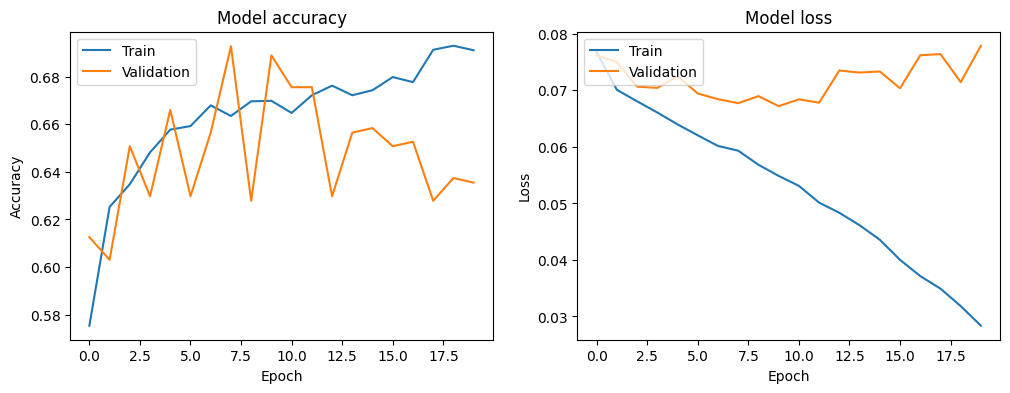

In [95]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

# Generate RGB Colors

In [96]:
from keras.utils import to_categorical
# plot a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

def scale(n):
    return int(n * 255) 

def predict(name):
    name = name.lower()
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    one_hot = to_categorical(padded, num_classes=44)
    pred = model.predict(np.array(one_hot))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
tensorflow orange, R,G,B: 247 130 23


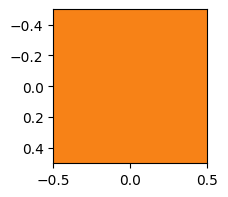

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
forest, R,G,B: 174 156 134


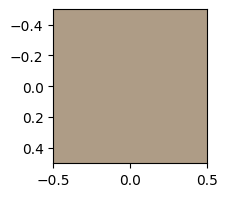

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
keras red, R,G,B: 209 40 64


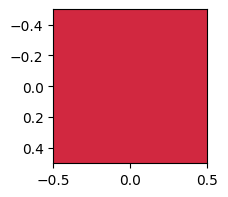

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
cream bull, R,G,B: 183 204 190


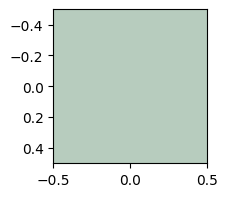

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
evil google, R,G,B: 198 142 51


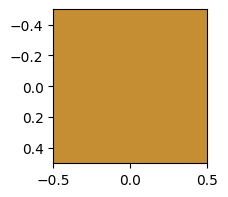

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
fantastic purple, R,G,B: 90 80 82


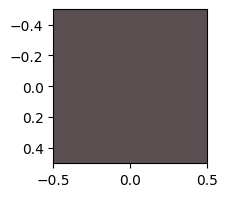

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
misterous john, R,G,B: 202 168 187


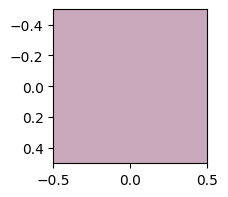

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
misterous yellow, R,G,B: 235 218 113


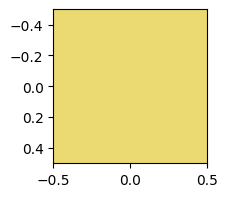

In [97]:
predict("tensorflow orange")
predict("forest")
predict("keras red")
predict("cream bull")
predict("evil google")
predict("fantastic purple")
predict("misterous john")
predict("misterous yellow")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
aereo, R,G,B: 150 189 149


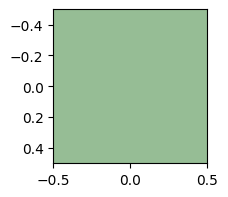

In [98]:
predict("aereo")